In [1]:
load('../etala_utilities.sage')

# Spring Exam
__Student__: Felix Blix Everberg  
__au ID__: au482985  
__Student number__: 201371008  
All calculations are done using sagemath ([www.sagemath.org](https://www.sagemath.org)) in a jupyter notebook, with the source code included.  


## Problem 1
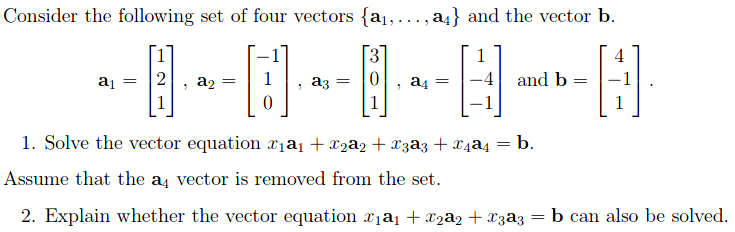

### 1.

To solve this equation, a matrix A is formed with the vectors as it's columns, and then solved by reducing the augmented matrix A|b to reduced row echelon form

In [5]:
a_1 = vector([1, 2, 1])
a_2 = vector([-1, 1, 0])
a_3 = vector([3, 0, 1])
a_4 = vector([1, -4, -1])
b = vector([1,2,1])
A = Matrix.column([a_1, a_2, a_3, a_4]); show_var()
A_aug_b = A.augment(b, subdivide=True); show_var()
A_aug_b_rref = A_aug_b.rref(); show_var()

\text{A} = \left[\begin{array}{rrrr}
1 & -1 & 3 & 1 \\
2 & 1 & 0 & -4 \\
1 & 0 & 1 & -1
\end{array}\right]

\text{A_aug_b} = \left[\begin{array}{rrrr|r}
1 & -1 & 3 & 1 & 1 \\
2 & 1 & 0 & -4 & 2 \\
1 & 0 & 1 & -1 & 1
\end{array}\right]

\text{A_aug_b_rref} = \left[\begin{array}{rrrr|r}
1 & 0 & 1 & -1 & 1 \\
0 & 1 & -2 & -2 & 0 \\
0 & 0 & 0 & 0 & 0
\end{array}\right]

Since there's no pivots in the third and fourth columns, $x_3$ and $x_4$ are set as a free variable. The above matrix corresponds to the following equations:  
$x_1 + x_3 - x_4 = 1$  
$x_2 - 2 x_3 -2 x_4 = 0$  
__which yields the solution:  
$ \boldsymbol x = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} + x_3 \begin{bmatrix} -1 \\ 2 \\ 1 \\ 0 \end{bmatrix} + x_4 \begin{bmatrix} 1 \\ 2 \\ 0 \\ 1 \end{bmatrix}$__

### 2.

Since $x_4$ is a free variable in the equation above, __solving the second equation is possible__, as it is the same as setting $x_4 = 0$

## Problem 2
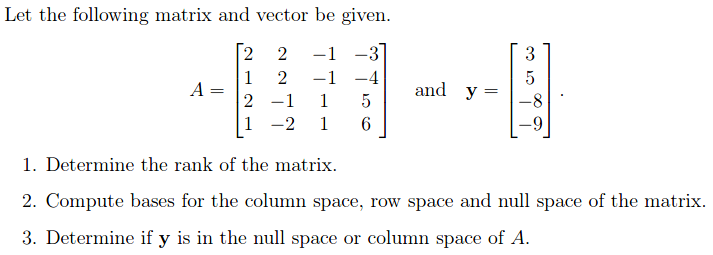

### 1.

In order to determine the rank, the matrix is reduced to rref form and the pivots are  counted

In [11]:
A = Matrix(SR, 4, 4, [2, 2, -1, -3, 1, 2, -1, -4, 2, -1, 1, 5, 1, -2, 1, 6])
A_rref = A.rref(); show_var()

\text{A_rref} = \left[\begin{array}{rrrr}
1 & 0 & 0 & 1 \\
0 & 1 & 0 & -2 \\
0 & 0 & 1 & 1 \\
0 & 0 & 0 & 0
\end{array}\right]

Since the matrix has three pivots, __it has rank 3__

### 2.

Since linear independence of rows and columns is conserved when converting to rref form, it is clear that the fourth column and row are linear combinations of the preceding, and so  
$\text{Col}(A) = \text{Span}\left\{\begin{bmatrix} 2 \\ 1 \\ 2 \\ 1 \end{bmatrix} 
                                   \begin{bmatrix} 2 \\ 2 \\ -1 \\ -2 \end{bmatrix} 
                                   \begin{bmatrix} -1 \\ -1 \\ 1 \\ 1 \end{bmatrix} \right\} $  
$\text{Row}(A) = \text{Span}\left\{\begin{bmatrix} 2 \\ 2 \\ -1 \\ -3 \end{bmatrix} 
                                   \begin{bmatrix} 1 \\ 2 \\ -1 \\ -4 \end{bmatrix} 
                                   \begin{bmatrix} 2 \\ -1 \\ 1 \\ 5 \end{bmatrix}  \right\} $  

The null space can be derived from the rref from in question 1, since this gives the solution to $A\boldsymbol x = 0$, with x_4 as a free variable:  
$ \boldsymbol x = x_4 \begin{bmatrix} -1 \\ 2 \\ -1 \\ 1 \end{bmatrix} $  
Which means that the null space is  
$\text{Nul}(A) = \text{Span}\left\{\begin{bmatrix} -1 \\ 2 \\ -1 \\ 1 \end{bmatrix}\right\} $  

### 3.

Looking at the signs of the vector in the basis for the null space, it is clear that $\boldsymbol y$ isn't a multiple thereof, and so __$\boldsymbol y$ isn't in the null space__.  
In order to see if $\boldsymbol y$ is in $\text{Nul}(A)$, row reduce the augmented matrix:

In [12]:
y = vector([3, 5, -8, -9])
Ay_rref = A.augment(y).rref(); show_var()

\text{Ay_rref} = \left[\begin{array}{rrrrr}
1 & 0 & 0 & 1 & -2 \\
0 & 1 & 0 & -2 & 3 \\
0 & 0 & 1 & 1 & -1 \\
0 & 0 & 0 & 0 & 0
\end{array}\right]

Hence $A\boldsymbol x = \boldsymbol y$ is consistent, and __$\boldsymbol y$ is in the column space of A__.

## Problem 3
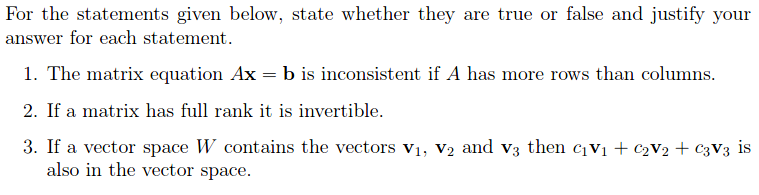

### 1.

__False__  
The equation will however have free variables if it is consistent.

### 2.

__False__  
Only if it is a square matrix

### 3.

__True__  
By definition, since the vector space must be closed under multiplication and closed under addition

## Problem 4
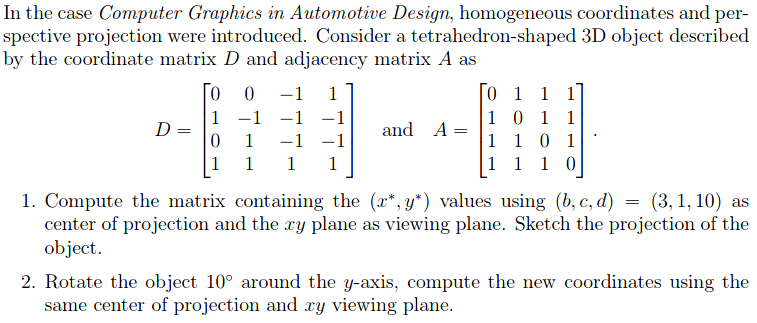

### 1.

To do this a projection matrix of the following form $P = \begin{bmatrix} 1 & 0 & -b/d & 0 \\ 0 & 1 & -c/d & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & -1/d & 1 \end{bmatrix}$  
The functions defined below is adapted from my solution to case2.

\text{D} = \left[\begin{array}{rrrr}
0 & 0 & -1 & 1 \\
1 & -1 & -1 & -1 \\
0 & 1 & -1 & -1 \\
1 & 1 & 1 & 1
\end{array}\right]

\text{A} = \left[\begin{array}{rrrr}
0 & 1 & 1 & 1 \\
1 & 0 & 1 & 1 \\
1 & 1 & 0 & 1 \\
1 & 1 & 1 & 0
\end{array}\right]

\text{P} = \left[\begin{array}{rrrr}
1 & 0 & -\frac{3}{10} & 0 \\
0 & 1 & -\frac{1}{10} & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & -\frac{1}{10} & 1
\end{array}\right] = \left[\begin{array}{rrrr}
1.00 & 0.000 & -0.300 & 0.000 \\
0.000 & 1.00 & -0.100 & 0.000 \\
0.000 & 0.000 & 0.000 & 0.000 \\
0.000 & 0.000 & -0.100 & 1.00
\end{array}\right]

\text{D_proj} = \left[\begin{array}{rrrr}
0 & -\frac{1}{3} & -\frac{7}{11} & \frac{13}{11} \\
1 & -\frac{11}{9} & -\frac{9}{11} & -\frac{9}{11}
\end{array}\right] = \left[\begin{array}{rrrr}
0.000 & -0.333 & -0.636 & 1.18 \\
1.00 & -1.22 & -0.818 & -0.818
\end{array}\right]

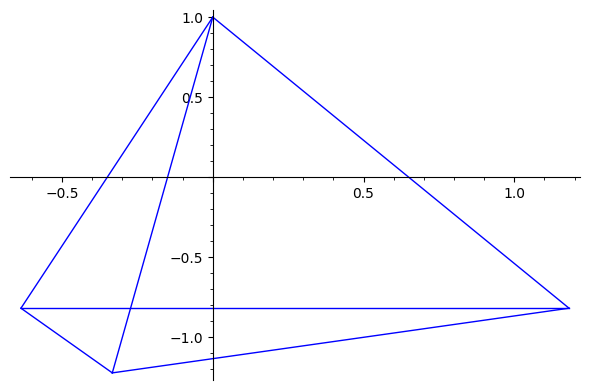

In [18]:
def project_data(D, p):
    # Extract the viewpoint coordinates
    b, c, d = p
    # Create the projection matrix
    P = Matrix(4, 4, [1, 0, -b/d, 0, 0, 1, -c/d, 0, 0, 0, 0, 0, 0, 0, -1/d, 1])
    # Calculate the projected points by nomalizing the columns of P*D by the fourth coordate 
    # and extracting the first two
    return P, Matrix.column([c[0:2]/c[3] for c in (P*D).columns()])

def show_projection(D_proj, ADJ):
    # Create a set of point tuples representing lines by iterating over the upper triangle of ADJ
    lines = line2d([], aspect_ratio=1)
    for i in range(D_proj.ncols()):
        for j in range(i, D_proj.ncols()):
            if ADJ[i, j] == 1:
                lines += line2d((D_proj.column(i), D_proj.column(j)))
    # Return the lines object
    show(lines)

D = Matrix(4, 4, [0, 0, -1, 1, 1, -1, -1, -1, 0, 1, -1, -1, 1, 1, 1, 1]); show_var()
A = Matrix(4, 4, [0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]); show_var()
cp = 3, 1, 10
P, D_proj = project_data(D, cp); show_var()
show_projection(D_proj, A)

### 2.

To do this a rotation matrix for homogenous coordinates is applied to D before projecting it.  
Again, the function defined below is taken from my solution to case 2

\text{D_proj} = \left[\begin{array}{rrrr}
0 & \frac{3 \, \cos\left(\frac{1}{18} \, \pi\right) + 10 \, \sin\left(\frac{1}{18} \, \pi\right)}{\cos\left(\frac{1}{18} \, \pi\right) - 10} & -\frac{7 \, \cos\left(\frac{1}{18} \, \pi\right) - 13 \, \sin\left(\frac{1}{18} \, \pi\right)}{\cos\left(\frac{1}{18} \, \pi\right) + \sin\left(\frac{1}{18} \, \pi\right) + 10} & \frac{13 \, \cos\left(\frac{1}{18} \, \pi\right) + 7 \, \sin\left(\frac{1}{18} \, \pi\right)}{\cos\left(\frac{1}{18} \, \pi\right) - \sin\left(\frac{1}{18} \, \pi\right) + 10} \\
1 & \frac{\cos\left(\frac{1}{18} \, \pi\right) + 10}{\cos\left(\frac{1}{18} \, \pi\right) - 10} & \frac{\cos\left(\frac{1}{18} \, \pi\right) + \sin\left(\frac{1}{18} \, \pi\right) - 10}{\cos\left(\frac{1}{18} \, \pi\right) + \sin\left(\frac{1}{18} \, \pi\right) + 10} & \frac{\cos\left(\frac{1}{18} \, \pi\right) - \sin\left(\frac{1}{18} \, \pi\right) - 10}{\cos\left(\frac{1}{18} \, \pi\right) - \sin\left(\frac{1}{18} \, \pi\right) + 10}
\end{array}\right] \sim \left[\begin{array}{rrrr}
0.000 & -0.520 & -0.415 & 1.30 \\
1.00 & -1.22 & -0.792 & -0.850
\end{array}\right]

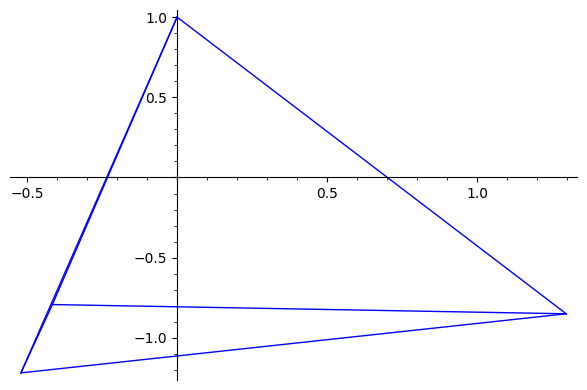

In [21]:
def create_rotation_matrix(angle_x=0, angle_y=0, angle_z=0):
    Tx = Matrix([[1,            0,             0, 0],
                 [0, cos(angle_x), -sin(angle_x), 0],
                 [0, sin(angle_x),  cos(angle_x), 0],
                 [0,            0,             0, 1]])
    Ty = Matrix([[cos(angle_y), 0, -sin(angle_y), 0],
                 [           0, 1,             0, 0],
                 [sin(angle_y), 0,  cos(angle_y), 0],
                 [           0, 0,             0, 1]])
    Tz = Matrix([[cos(angle_z), -sin(angle_z), 0, 0],
                 [sin(angle_z),  cos(angle_z), 0, 0],
                 [           0,             0, 1, 0],
                 [           0,             0, 0, 1]])
    return Tz*Ty*Tx
R = create_rotation_matrix(angle_y=10*pi/180)
_, D_proj = project_data(R*D, cp); show_var('D_proj')
show_projection(D_proj, A)


## Problem 5
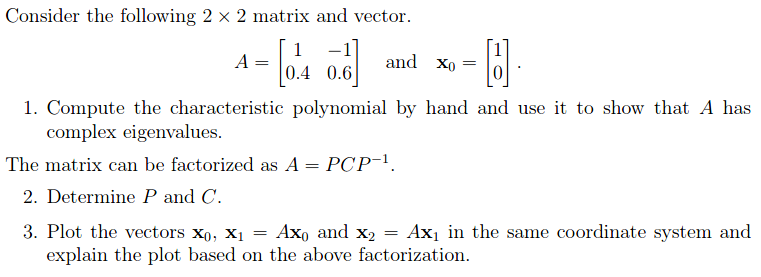

### 1.

In order to calculate the characteristic polynomial, note that $\text{det}\begin{bmatrix} a & b \\ c & d \end{bmatrix} = ad - bc$. Using this, the characteristic polynomial can be computed:  
$\text{det}(A-\lambda I) = \text{det}\begin{bmatrix} 1 - \lambda & -1 \\ 0.4 & 0.6 - \lambda \end{bmatrix} = (1 - \lambda)\cdot(0.6 - \lambda) - (-1) \cdot 0.4 = \lambda^2 - 1.6 \lambda + 1 $  
Solving for the roots of the polynomial one gets:  
$x = \frac{1.6\pm 1.2 I}{2} =  0.8 \pm 0.6I $  
__Since the roots of the characteristic polynomial are complex, A has complex eigenvalues.__

### 2.

First find the corresponding eigenvectors

In [65]:
A = Matrix(CC, 2, 2, [1, -1, 0.4, 0.6])
A.eigenvectors_right()

<ipython-input-65-1cc7c72480ae>:2: UserWarning: Using generic algorithm for an inexact ring, which may result in garbage from numerical precision issues.
  A.eigenvectors_right()


NotImplementedError: eigenspaces cannot be computed reliably for inexact rings such as Complex Field with 53 bits of precision,
consult numerical or symbolic matrix classes for other options

In [56]:
(1.6 - sqrt(1.6**2-4))/2

0.800000000000000 - 0.600000000000000*I

## Problem 6
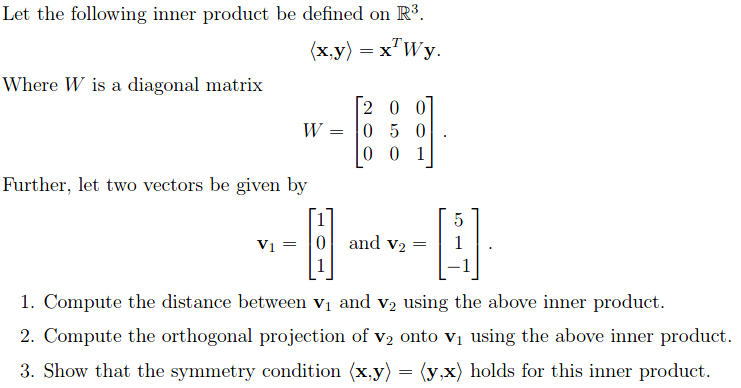

### 1.

Since the length of a vector in an inner product space is defined as $\Vert\boldsymbol v \Vert = \sqrt{\langle \boldsymbol v, \boldsymbol v, \rangle}$, the distance is found as the length of the vector $\boldsymbol v_2 - \boldsymbol v_1$

In [24]:
W = Matrix.diagonal(3, [2, 5, 1])
def inner_product(x, y):
    return x*W*y  # note that left multiplication of vectors in sage is automatically treated as a row vector
v_1 = vector([1, 0, 1])
v_2 = vector([5, 1, -1])
diff_v_1_v_2 = v_2 - v_1
dist_v_1_v_2 = sqrt(inner_product(diff_v_1_v_2, diff_v_1_v_2)); show_var()u

\text{dist_v_1_v_2} = \sqrt{41} \sim 6.40

### 2.

Using the formula  
$ y_{proj_u} = \frac{\langle y,  u \rangle}{\langle u,  u \rangle} u$

In [25]:
y_proj_u = inner_product(v_2, v_1)/inner_product(v_1, v_1) * v_1; show_var()

\text{y_proj_u} = \left(3,\,0,\,3\right)

### 3.

This can be done by calculating the algebraic form of the two inner products and comparing them

In [26]:
var('x_1, x_2, x_3, y_1, y_2, y_3')
x = vector([x_1, x_2, x_3])
y = vector([y_1, y_2, y_3])
inner_xy = inner_product(x, y); show_var()
inner_yx = inner_product(y, x); show_var()

\text{inner_xy} = 2 \, x_{1} y_{1} + 5 \, x_{2} y_{2} + x_{3} y_{3}

\text{inner_yx} = 2 \, x_{1} y_{1} + 5 \, x_{2} y_{2} + x_{3} y_{3}

Since the two inner products are the same, the symmetry condition holds